In [1]:
import utils

import random
import numpy as np
import matplotlib.pyplot as plt

x, y = utils.load_data_set()

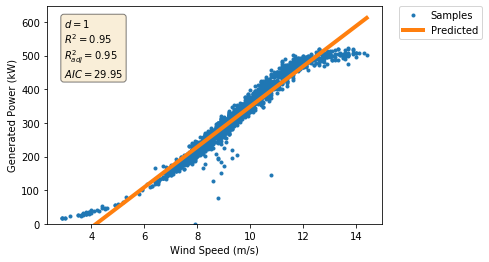

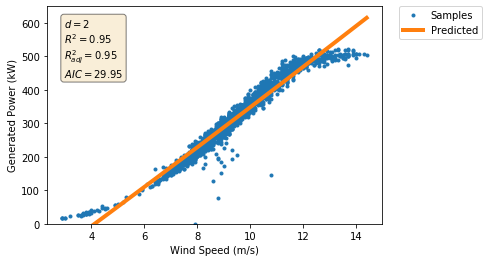

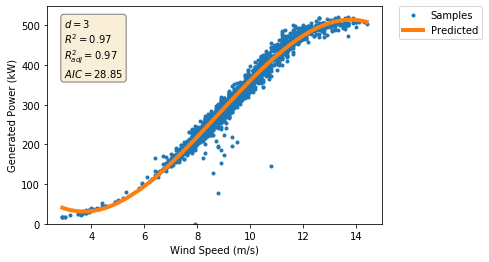

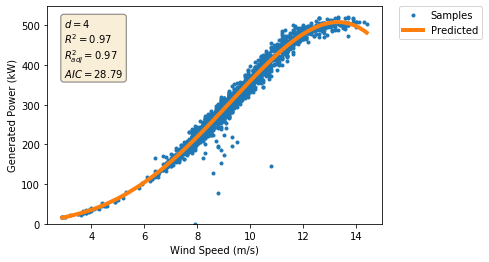

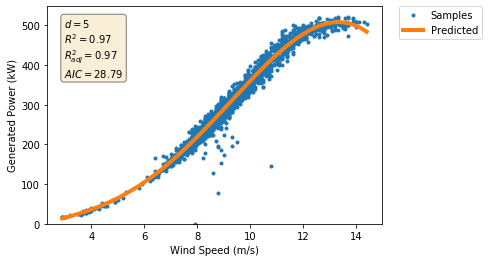

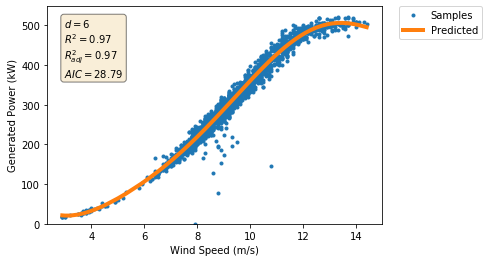

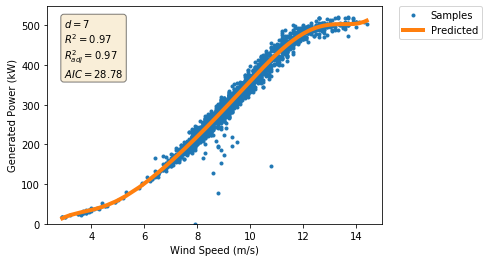

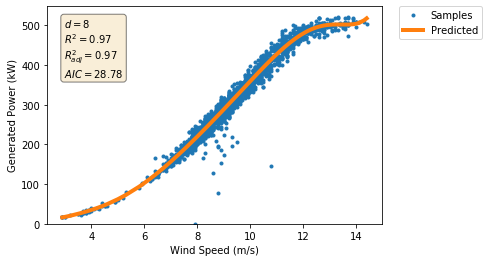

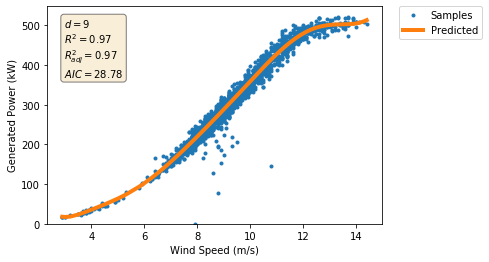

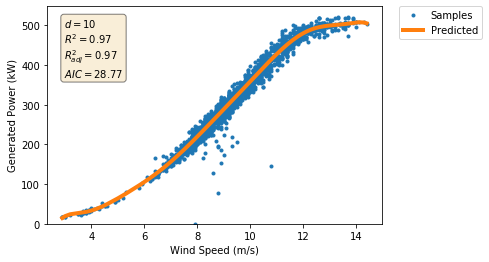

In [2]:
for i in range(1, 11):
    d = i

    z = np.polyfit(x, y, d)
    f = np.poly1d(z)

    fig, ax = plt.subplots()

    ax.plot(x, y, '.', label='Samples')
    ax.plot(x, f(x), label='Predicted', linewidth=4)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax.set_ylabel('Generated Power (kW)')
    ax.set_xlabel('Wind Speed (m/s)')

    r = utils.r_squared(y, f(x))
    r_adj = utils.r_squared_adj(y, f(x))
    aic = utils.aic(y, f(x))

    text = '\n'.join((
        r'$d=%d$' % (d, ),
        r'$R^2=%.2f$' % (r, ),
        r'$R^2_{adj}=%.2f$' % (r_adj, ),
        r'$AIC=%.2f$' % (aic, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, text , transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    plt.ylim(bottom=0)

    plt.show()

### Questão 1

Alguns valores de ordens de polinômio apresentaram critérios iguais se comparados com alguns. Obviamente, a depender do critério. Os critérios $R^2$ e $R^2_{adj}$, por exemplo, se repetiram para $ d \in \{1, 2\} | R^2(d) = R^2_{adj}(d) = 0,95$ e $d \in \{3, \ldots, 10\} | R^2(d) = R^2_{adj}(d) = 0,97$.

O critério de $AIC(d)$, apesar de também ter se repetido, pareceu ser mais sensível se comparado aos critérios $R^2$ e $R^2_{adj}$. Os valores de $AIC(d), \quad \forall d \in \{1, \ldots, 10\}$ apresentaram cinco valores diferentes enquanto que os valores de $R^2$ e $R^2_{adj}$ apresentaram apenas dois valores diferentes. Com isso, tomando como referência os valores retornados pelo critério $AIC(d)$, $d = 10$ apresentou o melhor critério $AIC(d)$.

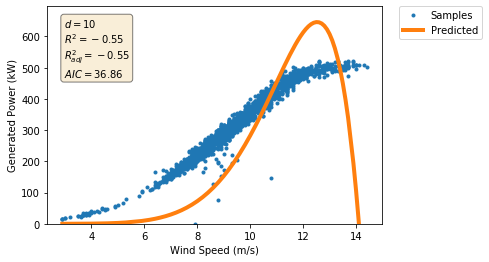

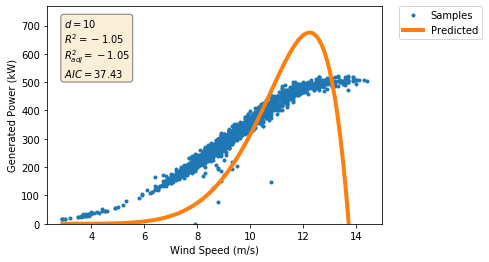

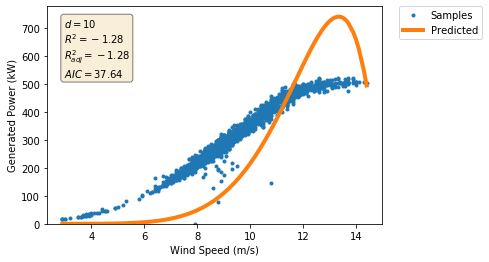

In [3]:
d = 10
M = 500000
p = int(M/2)

best =  utils.global_random_search(x, y, d, M, p)

for i in range(len(best)):
    f = np.poly1d(best[i])

    fig, ax = plt.subplots()

    ax.plot(x, y, '.', label='Samples')
    ax.plot(x, f(x), label='Predicted', linewidth=4)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax.set_ylabel('Generated Power (kW)')
    ax.set_xlabel('Wind Speed (m/s)')

    r = utils.r_squared(y, f(x))
    r_adj = utils.r_squared_adj(y, f(x))
    aic = utils.aic(y, f(x))

    text = '\n'.join((
        r'$d=%d$' % (d, ),
        r'$R^2=%.2f$' % (r, ),
        r'$R^2_{adj}=%.2f$' % (r_adj, ),
        r'$AIC=%.2f$' % (aic, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, text , transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    plt.ylim(bottom=0)

    plt.show()

### Questão 2

Os gráficos apresentados acima mostram as curvas de convergência das três melhores soluções obtidas pela heurística de busca aleatória global. Vale ressaltar que a escolha das $d$ variáveis foram submetidas a restições do tipo caixa. Mais especificamente, $-0.00005 \leq x_d \leq 0.00005$.

Os valores obtidos pela heurística de busca aleatória se apresentaram consideravelmente inferior se observados os critérios propostos. A qualidade da melhor solução obtida pela busca aleatória global ainda é muito inferior aos diferentes resultados obtidos pelos modelos de regressão polinomial. Isso acontece mesmo investigando 500.000 soluções aleatórias onde os coeficiente não se repetem em cada uma delas. 

O resultado obtidos são sempre diferentes uma vez que os coeficientes nunca se repetem.

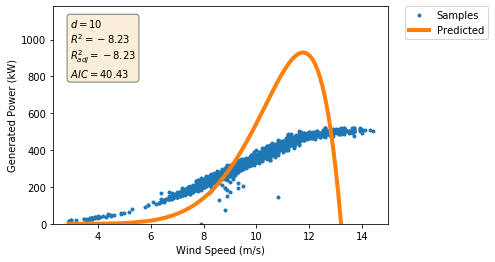

In [4]:
N = 100
G = 100
M = 5
error_squared = True

global_best = None
for m in range(M):
    population = []
    for i in range(N):
        population.append(utils.random_solution(10))

    #Computes generations
    for i in range(G):
        population = utils.selection(population, error_squared)
        offspring = utils.crossover(population, error_squared)
        offspring = utils.mutation(offspring, error_squared)

    #Gets the best solution from the population
    best = offspring[0]
    for i in range(N):
        if utils.error(offspring[i], error_squared) < utils.error(best, error_squared):
            best = offspring[i]
            
    if m == 0 or utils.error(best, error_squared) < utils.error(global_best, error_squared):
        global_best = best


"""
global_best = [-1.96936455e-06  3.02031328e-05 -4.72378295e-05 -3.26251301e-05
 -1.97722797e-05 -9.12494269e-06  1.03425022e-05  4.64649358e-05
  2.20195444e-05  0.00000000e+00]
"""
f = np.poly1d(global_best)

fig, ax = plt.subplots()

ax.plot(x, y, '.', label='Samples')
ax.plot(x, f(x), label='Predicted', linewidth=4)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_ylabel('Generated Power (kW)')
ax.set_xlabel('Wind Speed (m/s)')

r = utils.r_squared(y, f(x))
r_adj = utils.r_squared_adj(y, f(x))
aic = utils.aic(y, f(x))

text = '\n'.join((
    r'$d=%d$' % (d, ),
    r'$R^2=%.2f$' % (r, ),
    r'$R^2_{adj}=%.2f$' % (r_adj, ),
    r'$AIC=%.2f$' % (aic, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, text , transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.ylim(bottom=0)

plt.show()

### Questão 3

O algoritmo genético (GA) foi a metaheurística populacional adotada.

* Os resultados obtidos pela metaheurística populacional GA não apresentou melhoria significativa na velocidade de convergência. Na verdade, devido ao custo computacional maior, torna-se difícil executar a metaheurística de forma satisfatoriamente exaustiva como deseja-se. Além disso, os valores dos coeficientes obtidos não se aproximam dos valores obtidos na metaruhística simples implementada (GRS) e muito menos dos valores obtidos pela regressão polinomial. Apesar de os resultados serem sempre diferentes e, com isso, muitas soluções serem investigadas, não houve melhoria justificada para o aumento do custo computacional mais elevado na metaheurística populacional implementada. 

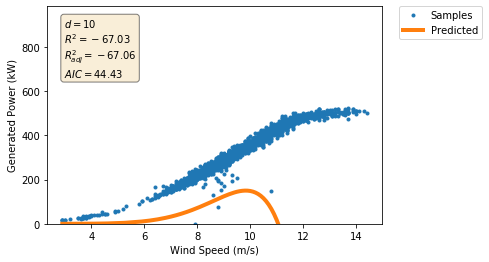

In [5]:
N = 100
G = 100
M = 5
error_squared = False

global_best = None
for m in range(M):
    population = []
    for i in range(N):
        population.append(utils.random_solution(10))

    #Computes generations
    for i in range(G):
        population = utils.selection(population, error_squared)
        offspring = utils.crossover(population, error_squared)
        offspring = utils.mutation(offspring, error_squared)

    #Gets the best solution from the population
    best = offspring[0]
    for i in range(N):
        if utils.error(offspring[i], error_squared) < utils.error(best, error_squared):
            best = offspring[i]
            
    if m == 0 or utils.error(best, error_squared) < utils.error(global_best, error_squared):
        global_best = best


f = np.poly1d(global_best)

fig, ax = plt.subplots()

ax.plot(x, y, '.', label='Samples')
ax.plot(x, f(x), label='Predicted', linewidth=4)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_ylabel('Generated Power (kW)')
ax.set_xlabel('Wind Speed (m/s)')

r = utils.r_squared(y, f(x))
r_adj = utils.r_squared_adj(y, f(x))
aic = utils.aic(y, f(x))

text = '\n'.join((
    r'$d=%d$' % (d, ),
    r'$R^2=%.2f$' % (r, ),
    r'$R^2_{adj}=%.2f$' % (r_adj, ),
    r'$AIC=%.2f$' % (aic, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, text , transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.ylim(bottom=0)

plt.show()

### Questão 4

Os valores dos coeficientes obtidos com a mudança da função objetivo variam muito se comparados às outras propostas de abordagem para o problema. Para a exeução atualmente sendo analisada, houve melhora se comparada a função objetivo usada anteriormente.